In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [54]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [56]:
df.partner.unique()

array([1., 2.])

In [52]:
df.shape

(8147, 13)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

- Switch to classifier since outcome is binary
- Loss function can't be residuals like with regressor
- Loss function options are deviance or exponentia

In [46]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Performance/variance check:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


print('\n\nBaseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))



Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

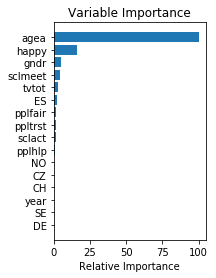

In [14]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

### Adjusting parameters:

In [47]:

#increase iterations from 500 to 1000
#increase max depth from 2 to 4
#change loss function from deviance to exponential
params1 = {'n_estimators': 1000,
           'max_depth':4,
           'loss':'deviance'}

#updated model, predictions, and accuracy calculations
clf1 = ensemble.GradientBoostingClassifier(**params1)
clf1.fit(X_train,y_train)

predict_train1 = clf1.predict(X_train)
predict_test1 = clf1.predict(X_test)

train_score1 = clf1.score(X_train, y_train)
test_score1 = clf1.score(X_test, y_test)

table_train1 = pd.crosstab(y_train, predict_train1, margins=True)
table_test1 = pd.crosstab(y_test, predict_test1, margins=True)

train_tI_errors1 = table_train1.loc[0.0,1.0] / table_train1.loc['All','All']
train_tII_errors1 = table_train1.loc[1.0,0.0] / table_train1.loc['All','All']

test_tI_errors1 = table_test1.loc[0.0,1.0] / table_test1.loc['All','All']
test_tII_errors1 = table_test1.loc[1.0,0.0] / table_test1.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score1, train_tI_errors1, train_tII_errors1,
         test_score1, test_tI_errors1, test_tII_errors1))

Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.9079378068739771
Percent Type I errors: 0.011320240043644299
Percent Type II errors: 0.08074195308237861

Test set accuracy:
R^2 score: 0.7153374233128834
Percent Type I errors: 0.10429447852760736
Percent Type II errors: 0.18036809815950922


**Result:** changing parameters doesn't have too much effect on predicting this data, and for the most part decreases in training set error did not translate to the test set; indicative model is overfitting

**Note:** many different iteration and depths were tried one at a time, each with deviance and exponential loss functions; there was no real improvement seen

### Trying subsampling, in order to decrease overfitting:

In [50]:
#apply subsample & learning rate
params2 = {'n_estimators': 500,
           'max_depth':2,
           'loss':'deviance',
           'subsample':.8,
           'learning_rate':.9}

#updated model, predictions, and accuracy calculations
clf2 = ensemble.GradientBoostingClassifier(**params2)
clf2.fit(X_train,y_train)

predict_train2 = clf2.predict(X_train)
predict_test2 = clf2.predict(X_test)

train_score2 = clf2.score(X_train, y_train)
test_score2 = clf2.score(X_test, y_test)

table_train2 = pd.crosstab(y_train, predict_train2, margins=True)
table_test2 = pd.crosstab(y_test, predict_test2, margins=True)

train_tI_errors2 = table_train2.loc[0.0,1.0] / table_train2.loc['All','All']
train_tII_errors2 = table_train2.loc[1.0,0.0] / table_train2.loc['All','All']

test_tI_errors2 = table_test2.loc[0.0,1.0] / table_test2.loc['All','All']
test_tII_errors2 = table_test2.loc[1.0,0.0] / table_test2.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score2, train_tI_errors2, train_tII_errors2,
         test_score2, test_tI_errors2, test_tII_errors2))

Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.8181942171303873
Percent Type I errors: 0.046235679214402615
Percent Type II errors: 0.13557010365521005

Test set accuracy:
R^2 score: 0.7141104294478527
Percent Type I errors: 0.12269938650306748
Percent Type II errors: 0.16319018404907976


### Trying out feature engineering to see if we can get better results:

In [127]:
#make a copy of the df to work with
df2 = df.copy()

# Turn the partner feature into a binary feature (0 and 1)
df2.partner = df2.partner - 1
# turn the 'gndr' feature into a binary feature as well:
df2.gndr = df2.gndr - 1

# get dummies for 'cntry', a categorical variable
df2 = pd.concat([df2, pd.get_dummies(df2['cntry'])],axis=1)
# dropping the cntry since we have dummy variables now, as well as idno
df2 = df2.drop(['cntry','idno'], 1)
df2.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,1.0,60.0,0.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,1.0,59.0,0.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,0.0,24.0,1.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,1.0,64.0,0.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0,55.0,0.0,1,0,0,0,0,0


Checking for multicollinearity: 

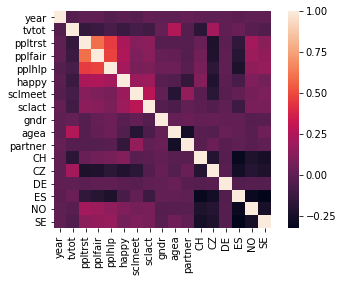

In [128]:
sns.heatmap(df2.corr(), square=True)
plt.show()

Looks like the 'ppltrst', 'pplfair', and 'pplhlp' variables exhibit high multicollinearity. These "human interaction" variables can be combined and averaged to create a new variable:

In [129]:
# Creating a people variable 
df2['people'] = (df2['ppltrst'] + df2['pplfair'] + df['pplhlp']) / 3
df2 = df2.drop(['ppltrst', 'pplfair', 'pplhlp'], 1)
df2.head()

,year,tvtot,happy,sclmeet,sclact,gndr,agea,partner,CH,CZ,DE,ES,NO,SE,people
0,6,3.0,8.0,5.0,4.0,1.0,60.0,0.0,1,0,0,0,0,0,6.000000
1,6,6.0,9.0,3.0,2.0,1.0,59.0,0.0,1,0,0,0,0,0,5.666667
2,6,1.0,7.0,6.0,3.0,0.0,24.0,1.0,1,0,0,0,0,0,8.000000
3,6,4.0,10.0,6.0,2.0,1.0,64.0,0.0,1,0,0,0,0,0,6.333333
4,6,5.0,8.0,7.0,2.0,1.0,55.0,0.0,1,0,0,0,0,0,6.000000


In [130]:
#set target and data
y2 = df2['partner']
X2 = df2.loc[:, ~df2.columns.isin(['partner'])]


#create new train and test sets
from sklearn.model_selection import train_test_split

#put 90% into train, 10% into test
X_train2,X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=4)

In [131]:
#try original model params on this dataset
params3 = {'n_estimators':500,
           'max_depth':2,
           'loss':'deviance',}

clf3 = ensemble.GradientBoostingClassifier(**params3)
clf3.fit(X_train2,y_train2)
 
predict_train3 = clf3.predict(X_train2)
predict_test3 = clf3.predict(X_test2)

train_score3 = clf3.score(X_train2, y_train2)
test_score3 = clf3.score(X_test2, y_test2)

table_train3 = pd.crosstab(y_train2, predict_train3, margins=True)
table_test3 = pd.crosstab(y_test2, predict_test3, margins=True)

train_tI_errors3 = table_train3.loc[0.0,1.0] / table_train3.loc['All','All']
train_tII_errors3 = table_train3.loc[1.0,0.0] / table_train3.loc['All','All']

test_tI_errors3 = table_test3.loc[0.0,1.0] / table_test3.loc['All','All']
test_tII_errors3 = table_test3.loc[1.0,0.0] / table_test3.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score3, train_tI_errors3, train_tII_errors3,
         test_score3, test_tI_errors3, test_tII_errors3))


Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.7710038188761593
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.18057828696126568

Test set accuracy:
R^2 score: 0.7815950920245399
Percent Type I errors: 0.04049079754601227
Percent Type II errors: 0.17791411042944785


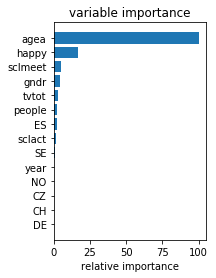

In [132]:
#see how feature importance is affected
feature_importance3 = clf3.feature_importances_

#make importances relative to max importance
feature_importance3 = 100.0 * (feature_importance3 / feature_importance3.max())
sorted_idx3 = np.argsort(feature_importance3)
pos3 = np.arange(sorted_idx3.shape[0]) + .5
plt.subplot(1,2,2)
plt.barh(pos3, feature_importance3[sorted_idx3], align='center')
plt.yticks(pos3, X2.columns[sorted_idx3])
plt.xlabel('relative importance')
plt.title('variable importance')
plt.show()

looks like this new variable, "people" doesnt really have much importance. No change from before the features were engineered unfortunately

Try SelectKBest:

In [163]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #using f_classif to select the best features:
import warnings
warnings.filterwarnings('ignore')


select = SelectKBest(score_func=f_classif, k=5)
fit = select.fit(X2,y2)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

      Specs       Score
6      agea  574.431925
3   sclmeet  222.226726
2     happy  175.077793
13   people   10.997969
5      gndr    9.417373


In [154]:
features2 = featureScores.sort_values(by='Score', ascending=False)
features2 = features2.head(5)

# Put the top keywords into a list: 
features2_list = list(features2.Specs)
features2_list


['agea', 'sclmeet', 'happy', 'people', 'gndr']

In [158]:
#set target and data
y3 = df2['partner']
X3 = df2[features2_list]


#create new train and test sets
from sklearn.model_selection import train_test_split

#put 90% into train, 10% into test
X_train3,X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=4)


In [162]:
#try original model params on this dataset
params3 = {'n_estimators':500,
           'max_depth':2,
           'loss':'deviance',}

clf4 = ensemble.GradientBoostingClassifier(**params3)
clf4.fit(X_train3,y_train3)
 
predict_train4 = clf4.predict(X_train3)
predict_test4 = clf4.predict(X_test3)

train_score4 = clf4.score(X_train3, y_train3)
test_score4 = clf4.score(X_test3, y_test3)

table_train4 = pd.crosstab(y_train3, predict_train4, margins=True)
table_test4 = pd.crosstab(y_test3, predict_test4, margins=True)

train_tI_errors4 = table_train4.loc[0.0,1.0] / table_train4.loc['All','All']
train_tII_errors4 = table_train4.loc[1.0,0.0] / table_train4.loc['All','All']

test_tI_errors4 = table_test4.loc[0.0,1.0] / table_test4.loc['All','All']
test_tII_errors4 = table_test4.loc[1.0,0.0] / table_test4.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score4, train_tI_errors4, train_tII_errors4,
         test_score4, test_tI_errors4, test_tII_errors4))


Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.7650027277686852
Percent Type I errors: 0.048554282596835786
Percent Type II errors: 0.186442989634479

Test set accuracy:
R^2 score: 0.7668711656441718
Percent Type I errors: 0.04785276073619632
Percent Type II errors: 0.18527607361963191


**Result:** eliminating features, even ones that don't explain much variance on their own, does not result in better predictions for this data.

In [171]:
#set target and data
y2 = df2['partner']
X2 = df2.loc[:, ~df2.columns.isin(['partner'])]
from sklearn.feature_selection import chi2

featurez = SelectKBest(score_func=chi2, k=5).fit_transform(X2,y2)

In [172]:
#set target and data
y3 = df2['partner']
X3 = featurez


#create new train and test sets
from sklearn.model_selection import train_test_split

#put 90% into train, 10% into test
X_train3,X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=4)


In [173]:
#try original model params on this dataset
params3 = {'n_estimators':500,
           'max_depth':2,
           'loss':'deviance',}

clf4 = ensemble.GradientBoostingClassifier(**params3)
clf4.fit(X_train3,y_train3)
 
predict_train4 = clf4.predict(X_train3)
predict_test4 = clf4.predict(X_test3)

train_score4 = clf4.score(X_train3, y_train3)
test_score4 = clf4.score(X_test3, y_test3)

table_train4 = pd.crosstab(y_train3, predict_train4, margins=True)
table_test4 = pd.crosstab(y_test3, predict_test4, margins=True)

train_tI_errors4 = table_train4.loc[0.0,1.0] / table_train4.loc['All','All']
train_tII_errors4 = table_train4.loc[1.0,0.0] / table_train4.loc['All','All']

test_tI_errors4 = table_test4.loc[0.0,1.0] / table_test4.loc['All','All']
test_tII_errors4 = table_test4.loc[1.0,0.0] / table_test4.loc['All','All']

print('Baseline results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score, train_tI_errors, train_tII_errors,
         test_score, test_tI_errors, test_tII_errors))
print('\nCurrent results:\n')
print((
    'Training set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'R^2 score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_score4, train_tI_errors4, train_tII_errors4,
         test_score4, test_tI_errors4, test_tII_errors4))


Baseline results:

Training set accuracy:
R^2 score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R^2 score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

Current results:

Training set accuracy:
R^2 score: 0.7624113475177305
Percent Type I errors: 0.049509001636661214
Percent Type II errors: 0.1880796508456083

Test set accuracy:
R^2 score: 0.7668711656441718
Percent Type I errors: 0.04785276073619632
Percent Type II errors: 0.18527607361963191
